In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
sns.set_palette('colorblind')

In [2]:
#!pip install dataframe_image

In [3]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets"+'\\'+'Everything_cleaned.csv',index_col=0)
#df = pd.read_csv('Everything_cleaned.csv')

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df

,Crime_ID,Month,Reported_by,Crime_type,Outcome_type,Year,Level_of_Lockdown,Region
0,e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...,2019-01-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
1,fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...,2019-01-01,Avon and Somerset,Violence and sexual offences,Unable to prosecute suspect,2019,No Lockdown,South West
2,4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...,2019-01-01,Avon and Somerset,Violence and sexual offences,No suspect identified,2019,No Lockdown,South West
3,2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...,2019-01-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
4,ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...,2019-01-01,Avon and Somerset,Theft offences,No suspect identified,2019,No Lockdown,South West
...,...,...,...,...,...,...,...,...
10297558,b81d4240a922e62a8ab5c7563e890f53503bbd9a72d30f...,2021-12-01,Wiltshire,Theft offences,No suspect identified,2021,Medium,South West
10297559,8936ed88bc946d71ea9e1ba7bf545d335aca64a2aad0c2...,2021-12-01,Wiltshire,Theft offences,No suspect identified,2021,Medium,South West
10297560,ec0357d8210b3df52277002d3a0f5967bf78d26d572583...,2021-12-01,Wiltshire,Theft offences,No suspect identified,2021,Medium,South West
10297561,8af4abefb399d3a2c1c71eec2045f3d4f9898c2ba97001...,2021-12-01,Wiltshire,Theft offences,No suspect identified,2021,Medium,South West


In [5]:
len(df.Reported_by.value_counts())

42

In [6]:
df.dtypes

Crime_ID             object
Month                object
Reported_by          object
Crime_type           object
Outcome_type         object
Year                  int64
Level_of_Lockdown    object
Region               object
dtype: object

In [7]:
grouped = df.groupby(['Year','Outcome_type'])['Crime_ID'].count().reset_index()

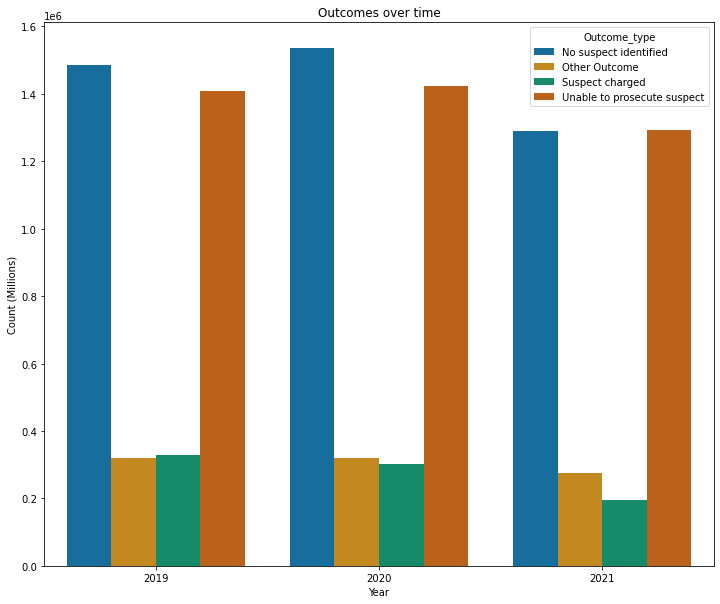

In [8]:
plt.figure(figsize=(12,10))
sns.barplot(data=grouped,x='Year',y='Crime_ID',hue='Outcome_type')
plt.ylabel('Count (Millions)')
plt.title('Outcomes over time')
plt.show()

In [9]:
grouped2 = df.groupby(['Crime_type','Outcome_type'])['Crime_ID'].count().reset_index()

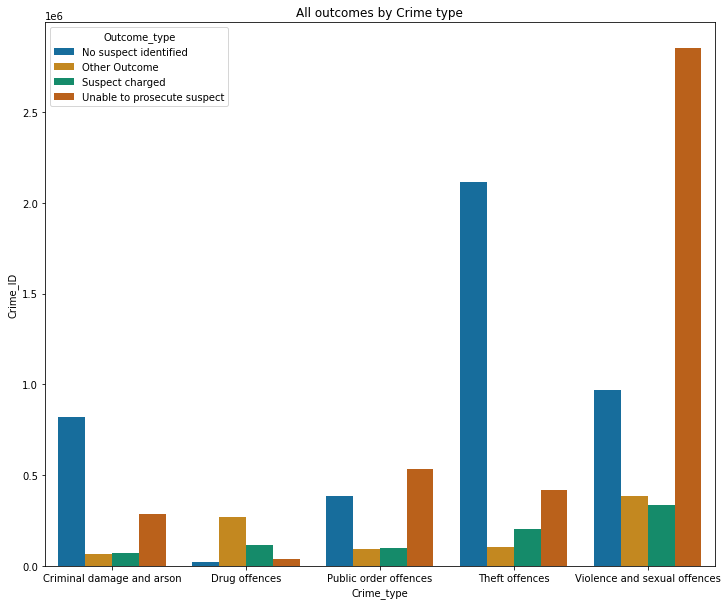

In [10]:
plt.figure(figsize=(12,10))
sns.barplot(data=grouped2,x='Crime_type',y='Crime_ID',hue='Outcome_type')
plt.title('All outcomes by Crime type')
plt.show()

In [11]:
grouped3 = df.groupby(['Year','Crime_type'])['Crime_ID'].count().reset_index()

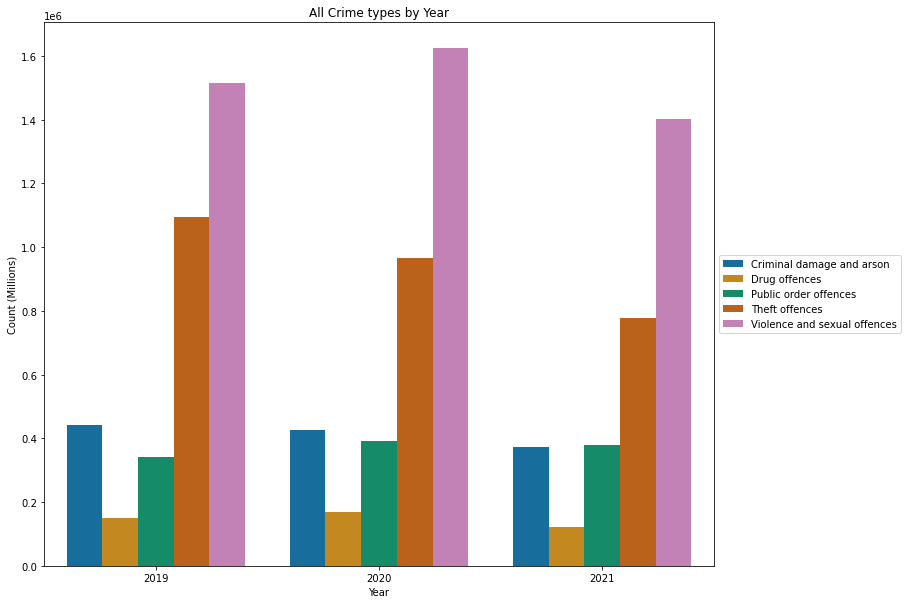

In [12]:
plt.figure(figsize=(12,10))
sns.barplot(data=grouped3,x='Year',y='Crime_ID',hue='Crime_type')
plt.ylabel('Count (Millions)')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.title('All Crime types by Year')
plt.show()

In [13]:
tab = pd.crosstab(df['Crime_type'],df['Outcome_type'],normalize=0)*100

In [14]:
tab

Outcome_type,No suspect identified,Other Outcome,Suspect charged,Unable to prosecute suspect
Crime_type,,,,
Criminal damage and arson,66.053033,5.315144,5.581935,23.049888
Drug offences,4.906264,60.537212,26.115081,8.441444
Public order offences,34.879873,8.269957,8.952953,47.897218
Theft offences,74.516240,3.628741,7.191615,14.663404
Violence and sexual offences,21.295684,8.504935,7.432865,62.766515


In [15]:
grouped4 = df.groupby(['Year','Crime_type','Outcome_type'])['Crime_ID'].count().reset_index()
grouped4

,Year,Crime_type,Outcome_type,Crime_ID
0,2019,Criminal damage and arson,No suspect identified,291371
1,2019,Criminal damage and arson,Other Outcome,24003
2,2019,Criminal damage and arson,Suspect charged,25998
3,2019,Criminal damage and arson,Unable to prosecute suspect,100564
4,2019,Drug offences,No suspect identified,6800
5,2019,Drug offences,Other Outcome,84881
6,2019,Drug offences,Suspect charged,44757
7,2019,Drug offences,Unable to prosecute suspect,13402
8,2019,Public order offences,No suspect identified,110839
9,2019,Public order offences,Other Outcome,29480


In [16]:
pivot = pd.pivot_table(grouped4,values='Crime_ID',columns=['Year','Crime_type'],index='Outcome_type')

In [17]:
pivot

Year                                             2019                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                          291371          6800   
Other Outcome                                   24003         84881   
Suspect charged                                 25998         44757   
Unable to prosecute suspect                    100564         13402   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                      110839         780432   
Other Outcome                               29480          50071   
Suspect charged                             35363          94160   
Unable to prosecute suspect                165243         170310   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                             295211   
Other Outcome                                     132664   
Suspect charged                                   129288   
Unable to prosecute suspect                       959445   

Year                                             2020                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                          280327          8924   
Other Outcome                                   22361        102251   
Suspect charged                                 25788         43813   
Unable to prosecute suspect                     98597         14192   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                      139316         734742   
Other Outcome                               32250          30465   
Suspect charged                             37657          66027   
Unable to prosecute suspect                182454         134004   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                             372561   
Other Outcome                                     132177   
Suspect charged                                   127306   
Unable to prosecute suspect                       992880   

Year                                             2021                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                          249040          5961   
Other Outcome                                   19679         80434   
Suspect charged                                 17572         26855   
Unable to prosecute suspect                     87244          9716   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                      137254         599234   
Other Outcome                               30124          22430   
Suspect charged                             26420          43876   
Unable to prosecute suspect                184295         111762   

Year                                                      
Crime_type                  Violence and sexual offences  
Outcome_type                                              
No suspect identified                             299728

Normalised by column, e.g in 2019, for every criminal damage case 66% had no suspect identified, 5% had an other outcome etc. 

In [18]:
pivot2 = pivot/pivot.sum()
pivot2 = pivot2.applymap(lambda x: "{0:.0f}%".format(100*x))
pivot2

Year                                             2019                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                             66%            5%   
Other Outcome                                      5%           57%   
Suspect charged                                    6%           30%   
Unable to prosecute suspect                       23%            9%   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                         33%            71%   
Other Outcome                                  9%             5%   
Suspect charged                               10%             9%   
Unable to prosecute suspect                   48%            16%   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                                19%   
Other Outcome                                         9%   
Suspect charged                                       9%   
Unable to prosecute suspect                          63%   

Year                                             2020                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                             66%            5%   
Other Outcome                                      5%           60%   
Suspect charged                                    6%           26%   
Unable to prosecute suspect                       23%            8%   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                         36%            76%   
Other Outcome                                  8%             3%   
Suspect charged                               10%             7%   
Unable to prosecute suspect                   47%            14%   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                                23%   
Other Outcome                                         8%   
Suspect charged                                       8%   
Unable to prosecute suspect                          61%   

Year                                             2021                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                             67%            5%   
Other Outcome                                      5%           65%   
Suspect charged                                    5%           22%   
Unable to prosecute suspect                       23%            8%   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                         36%            77%   
Other Outcome                                  8%             3%   
Suspect charged                                7%             6%   
Unable to prosecute suspect                   49%            14%   

Year                                                      
Crime_type                  Violence and sexual offences  
Outcome_type                                              
No suspect identified                                21%

In [19]:
import dataframe_image as dfi

In [20]:
#dfi.export(pivot2,"mytable.png")

In [21]:
pivot3 = pivot/pivot.sum()*100
pivot3

Year                                             2019                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                       65.930587      4.538174   
Other Outcome                                5.431329     56.647758   
Suspect charged                              5.882752     29.869861   
Unable to prosecute suspect                 22.755331      8.944207   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                   32.511256      71.274086   
Other Outcome                            8.647063       4.572807   
Suspect charged                         10.372663       8.599299   
Unable to prosecute suspect             48.469018      15.553808   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                          19.465214   
Other Outcome                                   8.747415   
Suspect charged                                 8.524813   
Unable to prosecute suspect                    63.262557   

Year                                             2020                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                       65.639130      5.274855   
Other Outcome                                5.235873     60.439177   
Suspect charged                              6.038312     25.897269   
Unable to prosecute suspect                 23.086685      8.388698   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                   35.569104      76.120294   
Other Outcome                            8.233825       3.156216   
Suspect charged                          9.614300       6.840489   
Unable to prosecute suspect             46.582771      13.883001   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                          22.927903   
Other Outcome                                   8.134350   
Suspect charged                                 7.834582   
Unable to prosecute suspect                    61.103165   

Year                                             2021                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                       66.671129      4.847681   
Other Outcome                                5.268315     65.411577   
Suspect charged                              4.704245     21.839370   
Unable to prosecute suspect                 23.356312      7.901371   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                   36.301651      77.091529   
Other Outcome                            7.967352       2.885622   
Suspect charged                          6.987699       5.644653   
Unable to prosecute suspect             48.743299      14.378195   

Year                                                      
Crime_type                  Violence and sexual offences  
Outcome_type                                              
No suspect identified                          21.384062

In [22]:
pivot4 = pd.pivot_table(grouped4,values='Crime_ID',columns=['Year','Outcome_type'],index='Crime_type')
pivot4

Year                                          2019                \
Outcome_type                 No suspect identified Other Outcome   
Crime_type                                                         
Criminal damage and arson                   291371         24003   
Drug offences                                 6800         84881   
Public order offences                       110839         29480   
Theft offences                              780432         50071   
Violence and sexual offences                295211        132664   

Year                                                                      \
Outcome_type                 Suspect charged Unable to prosecute suspect   
Crime_type                                                                 
Criminal damage and arson              25998                      100564   
Drug offences                          44757                       13402   
Public order offences                  35363                      165243   
Theft offences                         94160                      170310   
Violence and sexual offences          129288                      959445   

Year                                          2020                \
Outcome_type                 No suspect identified Other Outcome   
Crime_type                                                         
Criminal damage and arson                   280327         22361   
Drug offences                                 8924        102251   
Public order offences                       139316         32250   
Theft offences                              734742         30465   
Violence and sexual offences                372561        132177   

Year                                                                      \
Outcome_type                 Suspect charged Unable to prosecute suspect   
Crime_type                                                                 
Criminal damage and arson              25788                       98597   
Drug offences                          43813                       14192   
Public order offences                  37657                      182454   
Theft offences                         66027                      134004   
Violence and sexual offences          127306                      992880   

Year                                          2021                \
Outcome_type                 No suspect identified Other Outcome   
Crime_type                                                         
Criminal damage and arson                   249040         19679   
Drug offences                                 5961         80434   
Public order offences                       137254         30124   
Theft offences                              599234         22430   
Violence and sexual offences                299728        121553   

Year                                                                      
Outcome_type                 Suspect charged Unable to prosecute suspect  
Crime_type                                                                
Criminal damage and arson              17572                       87244  
Drug offences                          26855                        9716  
Public order offences                  26420                      184295  
Theft offences                         43876                      111762  
Violence and sexual offences           81094                      899267

In [23]:
pivot2019 = pivot4.loc[slice(None),(2019)]
#pivot2019 = pivot2019/pivot2019.sum()
pivot2019 = pivot2019.div(pivot2019.sum(axis=1), axis=0)
pivot2019

Outcome_type,No suspect identified,Other Outcome,Suspect charged,Unable to prosecute suspect
Crime_type,,,,
Criminal damage and arson,0.659306,0.054313,0.058828,0.227553
Drug offences,0.045382,0.566478,0.298699,0.089442
Public order offences,0.325113,0.086471,0.103727,0.484690
Theft offences,0.712741,0.045728,0.085993,0.155538
Violence and sexual offences,0.194652,0.087474,0.085248,0.632626


In [24]:
tab2 = pd.crosstab(columns=[df['Year'],df['Crime_type']],index=df['Outcome_type'])
tab2

Year                                             2019                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                          291371          6800   
Other Outcome                                   24003         84881   
Suspect charged                                 25998         44757   
Unable to prosecute suspect                    100564         13402   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                      110839         780432   
Other Outcome                               29480          50071   
Suspect charged                             35363          94160   
Unable to prosecute suspect                165243         170310   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                             295211   
Other Outcome                                     132664   
Suspect charged                                   129288   
Unable to prosecute suspect                       959445   

Year                                             2020                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                          280327          8924   
Other Outcome                                   22361        102251   
Suspect charged                                 25788         43813   
Unable to prosecute suspect                     98597         14192   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                      139316         734742   
Other Outcome                               32250          30465   
Suspect charged                             37657          66027   
Unable to prosecute suspect                182454         134004   

Year                                                      \
Crime_type                  Violence and sexual offences   
Outcome_type                                               
No suspect identified                             372561   
Other Outcome                                     132177   
Suspect charged                                   127306   
Unable to prosecute suspect                       992880   

Year                                             2021                \
Crime_type                  Criminal damage and arson Drug offences   
Outcome_type                                                          
No suspect identified                          249040          5961   
Other Outcome                                   19679         80434   
Suspect charged                                 17572         26855   
Unable to prosecute suspect                     87244          9716   

Year                                                              \
Crime_type                  Public order offences Theft offences   
Outcome_type                                                       
No suspect identified                      137254         599234   
Other Outcome                               30124          22430   
Suspect charged                             26420          43876   
Unable to prosecute suspect                184295         111762   

Year                                                      
Crime_type                  Violence and sexual offences  
Outcome_type                                              
No suspect identified                             299728

In [25]:
def pivoting_stacks(df,year):
    res = df.loc[slice(None),(year)]
    res = res.div(res.sum(axis=1), axis=0)
    return res

In [26]:
pivot2019 = pivoting_stacks(pivot4,2019)
pivot2020 = pivoting_stacks(pivot4,2020)
pivot2021 = pivoting_stacks(pivot4,2021)

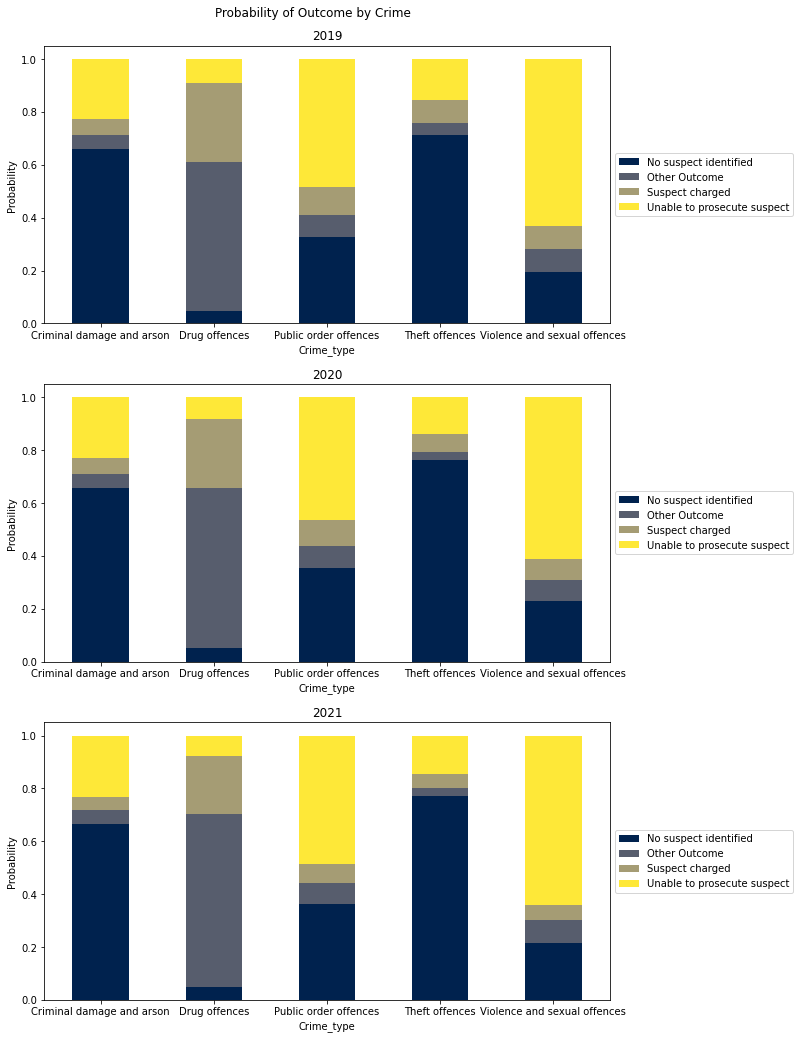

In [27]:
fig, (a1,a2,a3) = plt.subplots(3,1,figsize=(11,14),constrained_layout = True)
my_suptitle = fig.suptitle('Probability of Outcome by Crime',x=0.39,y=1.02)
pivot2019.plot.bar(stacked=True,ax=a1,rot=0,title='2019',colormap='cividis',ylabel='Probability').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
pivot2020.plot.bar(stacked=True,ax=a2,rot=0,title='2020',colormap='cividis',ylabel='Probability').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
pivot2021.plot.bar(stacked=True,ax=a3,rot=0,title='2021',colormap='cividis',ylabel='Probability').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
fig.savefig('suptitle_test.jpg', dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()


In [28]:
tab3 = pd.crosstab(columns=[df['Year'],df['Outcome_type']],index=df['Region'])
tab3

Year                           2019                                \
Outcome_type  No suspect identified Other Outcome Suspect charged   
Region                                                              
East Midlands                338914         68193           79448   
North                        141791         31301           27657   
South East                   539389        118064          101709   
South West                   182176         49256           57773   
West Midlands                282383         54285           62979   

Year                                                       2020                \
Outcome_type  Unable to prosecute suspect No suspect identified Other Outcome   
Region                                                                          
East Midlands                      386654                286892         79261   
North                               87823                117535         24916   
South East                         372020                762806        122999   
South West                         260915                138312         46239   
West Midlands                      301552                230325         46089   

Year                                                       \
Outcome_type  Suspect charged Unable to prosecute suspect   
Region                                                      
East Midlands           70447                      388328   
North                   25873                       86284   
South East              97239                      369298   
South West              53655                      259116   
West Midlands           53377                      319101   

Year                           2021                                \
Outcome_type  No suspect identified Other Outcome Suspect charged   
Region                                                              
East Midlands                289821         70388           49721   
North                        109002         19342           17726   
South East                   588702        106110           63474   
South West                   122095         36482           34887   
West Midlands                181597         41898           30009   

Year                                       
Outcome_type  Unable to prosecute suspect  
Region                                     
East Midlands                      376532  
North                               81614  
South East                         334526  
South West                         240208  
West Midlands                      259404

In [29]:
pivot2019_2 = pivoting_stacks(tab3,2019)
pivot2020_2 = pivoting_stacks(tab3,2020)
pivot2021_2 = pivoting_stacks(tab3,2021)

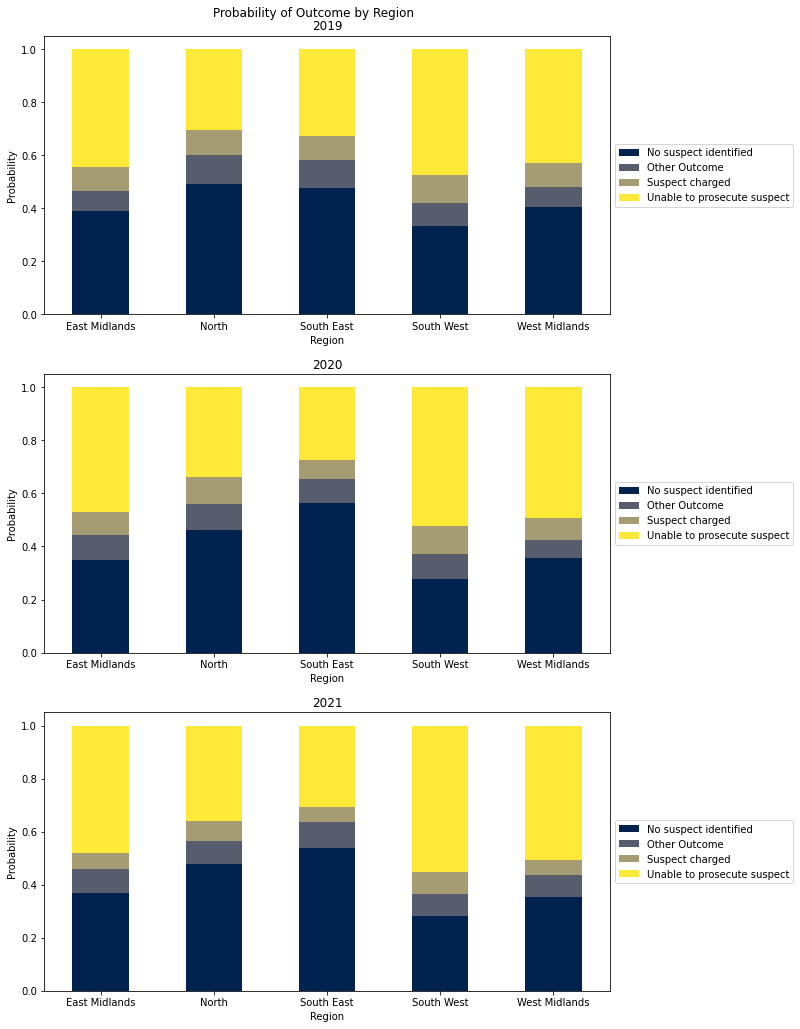

In [30]:
fig, (a1,a2,a3) = plt.subplots(3,1,figsize=(11,14),constrained_layout = True)
fig.suptitle('Probability of Outcome by Region',x=0.39,y=1.01)
pivot2019_2.plot.bar(stacked=True,ax=a1,title='2019',rot=0,colormap='cividis',ylabel='Probability').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
pivot2020_2.plot.bar(stacked=True,ax=a2,title='2020',rot=0,colormap='cividis',ylabel='Probability').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
pivot2021_2.plot.bar(stacked=True,ax=a3,rot=0,title='2021',colormap='cividis',ylabel='Probability').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Probability')
#plt.savefig('Prob_of_outcome_by_region.jpg')
plt.show()

In [31]:
grouped4 = df.groupby(['Month','Region','Outcome_type'])['Crime_ID'].count().reset_index()


In [32]:
grouped4['Month'] = pd.to_datetime(grouped4['Month'])

In [33]:
grouped4

,Month,Region,Outcome_type,Crime_ID
0,2019-01-01,East Midlands,No suspect identified,28641
1,2019-01-01,East Midlands,Other Outcome,5746
2,2019-01-01,East Midlands,Suspect charged,6477
3,2019-01-01,East Midlands,Unable to prosecute suspect,29608
4,2019-01-01,North,No suspect identified,11534
...,...,...,...,...
715,2021-12-01,South West,Unable to prosecute suspect,8247
716,2021-12-01,West Midlands,No suspect identified,7097
717,2021-12-01,West Midlands,Other Outcome,1392
718,2021-12-01,West Midlands,Suspect charged,648


In [34]:
grouped5 = df.groupby(['Month','Region','Crime_type'])['Crime_ID'].count().reset_index()
grouped5['Month'] = pd.to_datetime(grouped5['Month'])
grouped5.head()

,Month,Region,Crime_type,Crime_ID
0,2019-01-01,East Midlands,Criminal damage and arson,9274
1,2019-01-01,East Midlands,Drug offences,2146
2,2019-01-01,East Midlands,Public order offences,6168
3,2019-01-01,East Midlands,Theft offences,23778
4,2019-01-01,East Midlands,Violence and sexual offences,29106


In [35]:
grouped5['Count_normed'] = grouped5.apply(lambda row: (row['Crime_ID']/10475600)*10000 if row['Region']=='East Midlands' else ((row['Crime_ID']/22145000
)*10000 if row['Region']=='South East' else ((row['Crime_ID']/9937900)*10000 if row['Region']=='South West' else ((row['Crime_ID']/9584002)*10000 if row['Region']=='West Midlands' else 
                                                                                                                  ((row['Crime_ID']/3977308)*10000 if row['Region']=='North' else 'test')))),axis=1)


In [36]:
grouped5['Count_normed_pol'] = grouped5.apply(lambda row: (row['Crime_ID']/20522)*100 if row['Region']=='East Midlands' else 
                                              ((row['Crime_ID']/58161)*100 if row['Region']=='South East' else 
                                               ((row['Crime_ID']/18605)*100 if row['Region']=='South West' else 
                                                ((row['Crime_ID']/18156)*100 if row['Region']=='West Midlands' else 
                                                ((row['Crime_ID']/8062)*100 if row['Region']=='North' else 'test')))),axis=1)


In [37]:
grouped5

,Month,Region,Crime_type,Crime_ID,Count_normed,Count_normed_pol
0,2019-01-01,East Midlands,Criminal damage and arson,9274,8.852954,45.190527
1,2019-01-01,East Midlands,Drug offences,2146,2.048570,10.457070
2,2019-01-01,East Midlands,Public order offences,6168,5.887968,30.055550
3,2019-01-01,East Midlands,Theft offences,23778,22.698461,115.865900
4,2019-01-01,East Midlands,Violence and sexual offences,29106,27.784566,141.828282
...,...,...,...,...,...,...
895,2021-12-01,West Midlands,Criminal damage and arson,2102,2.193238,11.577440
896,2021-12-01,West Midlands,Drug offences,432,0.450751,2.379379
897,2021-12-01,West Midlands,Public order offences,2140,2.232888,11.786737
898,2021-12-01,West Midlands,Theft offences,4154,4.334306,22.879489


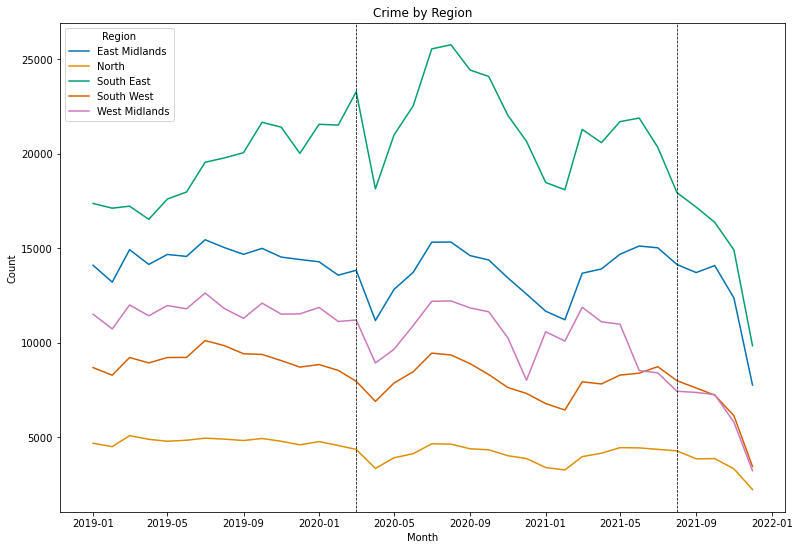

In [38]:
plt.figure(figsize=(13,9))
sns.lineplot(data=grouped5,x='Month',y='Crime_ID',hue='Region',ci=None)
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
plt.title('Crime by Region')
plt.ylabel('Count')
plt.show()

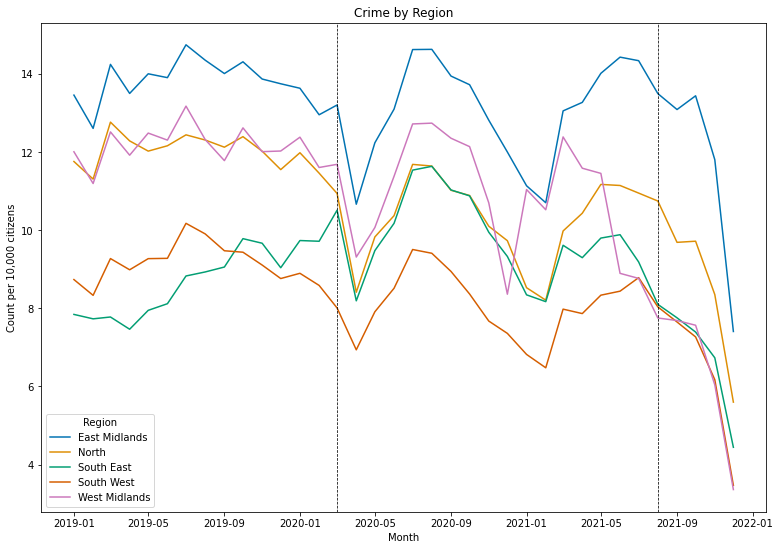

In [39]:
plt.figure(figsize=(13,9))
sns.lineplot(data=grouped5,x='Month',y='Count_normed',hue='Region',ci=None)
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
plt.title('Crime by Region')
plt.ylabel('Count per 10,000 citizens')
plt.show()

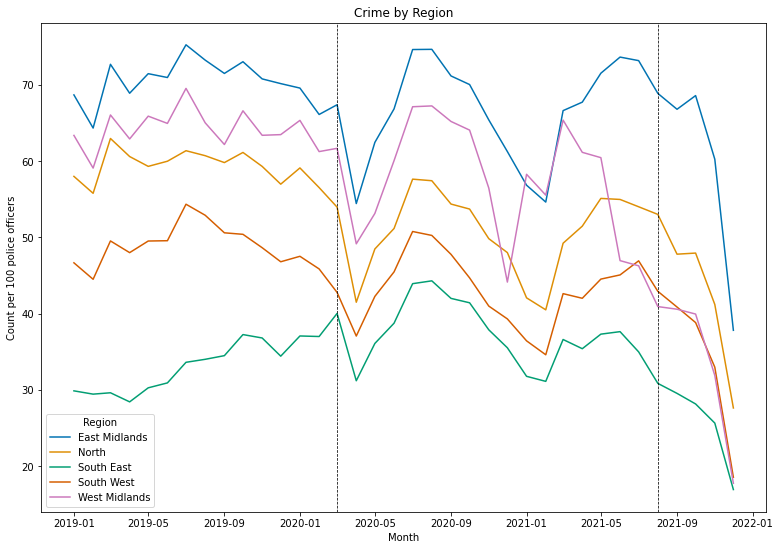

In [40]:
plt.figure(figsize=(13,9))
sns.lineplot(data=grouped5,x='Month',y='Count_normed_pol',hue='Region',ci=None)
plt.axvline(dt.datetime(2020, 3, 1),linestyle='--',color='black',linewidth=0.75)
plt.axvline(dt.datetime(2021, 8, 1),linestyle='--',color='black',linewidth=0.75)
plt.title('Crime by Region')
plt.ylabel('Count per 100 police officers')
plt.show()

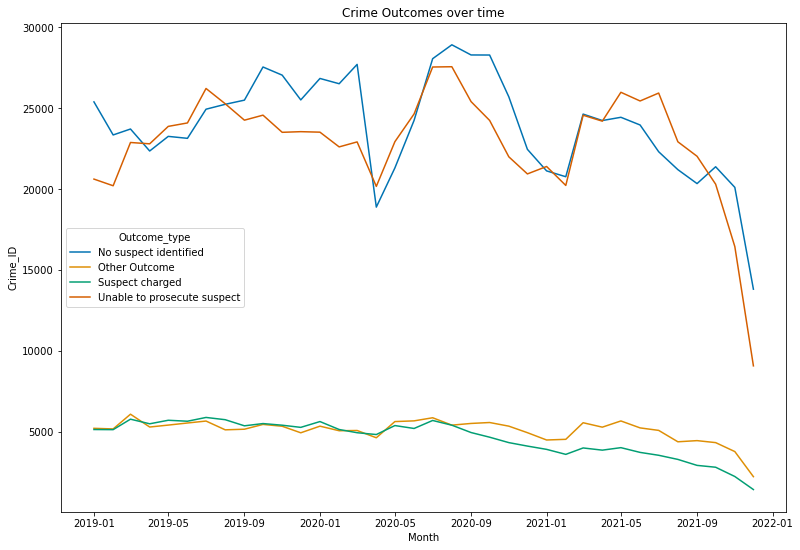

In [41]:
plt.figure(figsize=(13,9))
sns.lineplot(data=grouped4,x='Month',y='Crime_ID',hue='Outcome_type',ci=None)
plt.title('Crime Outcomes over time')
plt.show()

Missing Derbyshire, Greater Manchester and West Midlands for 2021-12, this explains the large dip. This probably won't really affect the results but a decision should be made on removing them from the dataset entirely if can't find the corresponding data.

Greater Manchester is missing for all of 2020, should probably be dropped from the whole dataset.

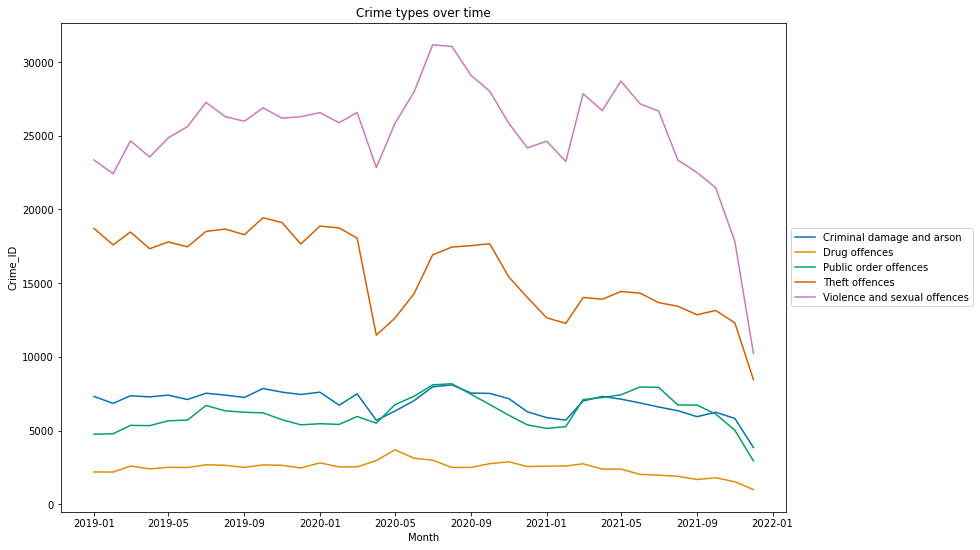

In [42]:
plt.figure(figsize=(13,9))
sns.lineplot(data=grouped5,x='Month',y='Crime_ID',hue='Crime_type',ci=None)
plt.title('Crime types over time')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [43]:
grouped6 = df.groupby(['Level_of_Lockdown','Region'])['Crime_ID'].count()

In [44]:
grouped6

Level_of_Lockdown  Region       
High               East Midlands     824928
                   North             254608
                   South East       1352342
                   South West        497322
                   West Midlands     648892
Medium             East Midlands     786462
                   North             227684
                   South East       1092812
                   South West        433672
                   West Midlands     512908
No Lockdown        East Midlands     873209
                   North             288572
                   South East       1131182
                   South West        550120
                   West Midlands     701199
Name: Crime_ID, dtype: int64

In [55]:
tab4 = pd.crosstab(columns=[df['Crime_type']],index=df['Region'],normalize='columns')
tab4

Crime_type,Criminal damage and arson,Drug offences,Public order offences,Theft offences,Violence and sexual offences
Region,,,,,
East Midlands,0.252309,0.183610,0.269411,0.233156,0.248532
North,0.104903,0.049959,0.076133,0.076080,0.069995
South East,0.315409,0.485330,0.318576,0.399137,0.326538
South West,0.148867,0.128484,0.153546,0.125833,0.156665
West Midlands,0.178512,0.152618,0.182334,0.165795,0.198270
